# <center><h1><b><font color ='Red'> Fake News Classifier</b> </font> </h1><center>

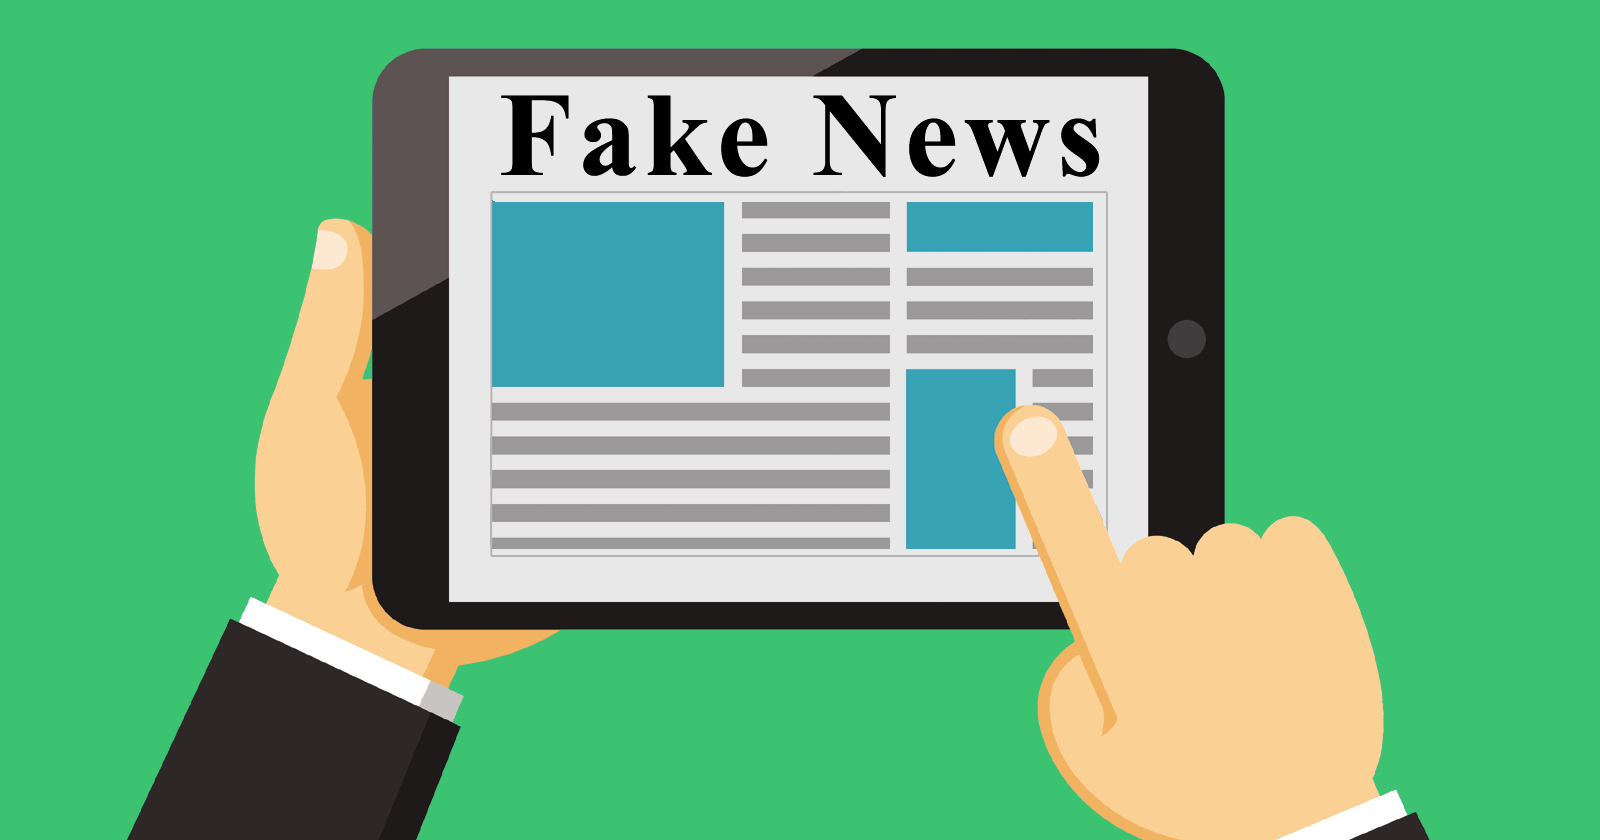

# <b><font color ='purple'> Dataset Description </b> </font> 
 
 <h3><b><font color ='green'> train.csv:  </b> </font></h3>
 <b>A full training dataset with the following attributes:
    <li><b><font color ='red'>id:</b> </font> unique id for a news article</li>
    <li><b><font color ='red'>title: </b> </font>the title of a news article</li>
    <li><b><font color ='red'>author:</b> </font> author of the news article</li>
    <li><b><font color ='red'>text:</b> </font> the text of the article; could be incomplete</li>
    <li><b><font color ='red'>label:</b> </font> a label that marks the article as potentially unreliable</li>
          <b><font color ='blue'>1: </b> </font>unreliable<br>
         <b><t><font color ='blue'>0:</b> </font> reliable
</li><br>
<h3><b><font color ='green'>test.csv: </b> </font></h3>
<li>
A testing training dataset with all the same attributes at train.csv without the label.
</li>

## <b><font color ='purple'>Import required libaries for preprocessing</b> </font> 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter # library for Count Words
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install wordcloud

In [3]:
# load dataset
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# we will only Going to use title and author Columns for Our prediction
df.drop(['id','text'],axis=1,inplace=True)

In [5]:
df.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


## <b><font color ='purple'>Data Cleaning</b> </font> 

In [6]:
# Check for Null Values
df.isnull().sum()

title      558
author    1957
label        0
dtype: int64

In [7]:
# Drop Null values
df = df.dropna()

In [8]:
# Check for Duplicated Values
df.duplicated().sum()

164

In [9]:
# Drop Duplicated Values
df = df.drop_duplicates(keep='first')

In [10]:
# Merge both Columns Author and Title and Create New Column Content
df['content'] = df['title'] + ' ' + df['author'] 

In [11]:
df.head()

,title,author,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Iranian woman jailed for fictional unpublished...


## <b><font color ='purple'>Data Preprocessing</b> </font> 
<li> Convert text to lowercase</li>
<li> Tokenization</li>
<li> Remove stopwords</li>
<li> Remove punctuation</li>
<li> Stemming</li>


In [12]:
ps = PorterStemmer()

In [13]:
# Function for entire text transformation
def text_preprocessing(text): 
    # 2- Convert text into lowercase
    text = text.lower()
    
    #  2-Tokenize text into list
    tokenize_text = nltk.word_tokenize(text)
    
    # 3- remove Stopwords
    text_without_stopwords = [i for i in tokenize_text if i not in stopwords.words('english')]
    
    # 4- Remove Punctuation
    text_without_punc = [i for i in text_without_stopwords if i not in string.punctuation]
    
    # 5- stemming on that word
    transformed_text = [ps.stem(i) for i in text_without_punc if i.isalnum() == True]
    
    return " ".join(transformed_text)

In [14]:
# Let's Apply This Transformation Function on Our Content Column
df['transformed_content'] = df['content'].apply(text_preprocessing)

In [15]:
# Drop title author and old content column
df = df.drop(['title','author','content'],axis=1)

In [16]:
df.head()

,label,transformed_content
0,1,hous dem aid even see comey letter jason chaff...
1,0,flynn hillari clinton big woman campu breitbar...
2,1,truth might get fire
3,1,15 civilian kill singl us airstrik identifi je...
4,1,iranian woman jail fiction unpublish stori wom...


In [17]:
# let's create new column like number of characters, number of words
df['number_of_characters'] = df['transformed_content'].apply(lambda x:len(x))
df['number_of_words'] = df['transformed_content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,label,transformed_content,number_of_characters,number_of_words
0,1,hous dem aid even see comey letter jason chaff...,67,12
1,0,flynn hillari clinton big woman campu breitbar...,60,9
2,1,truth might get fire,20,4
3,1,15 civilian kill singl us airstrik identifi je...,59,9
4,1,iranian woman jail fiction unpublish stori wom...,84,12


## <b><font color ='purple'>Exploratory Data Analysis</b> </font> 

<AxesSubplot:xlabel='label', ylabel='count'>

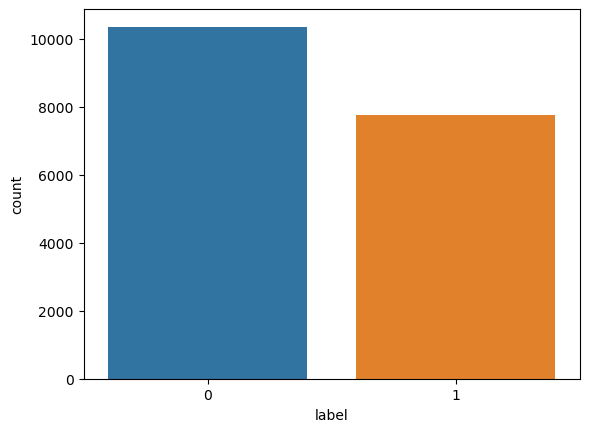

In [19]:
# Check Count of labels
sns.countplot(x='label',data=df)

### **Our Data is Balanced**

In [20]:
# statical info for True news
df[['number_of_characters','number_of_words']][df['label'] == 0].describe()

,number_of_characters,number_of_words
count,10355.000000,10355.000000
mean,71.675519,11.721004
std,14.937684,2.313864
min,23.000000,4.000000
25%,62.000000,10.000000
50%,71.000000,12.000000
75%,81.000000,13.000000
max,146.000000,24.000000


In [21]:
# statical info for fake news
df[['number_of_characters','number_of_words']][df['label'] == 1].describe()

,number_of_characters,number_of_words
count,7766.000000,7766.000000
mean,59.008499,9.361834
std,22.807008,3.557842
min,3.000000,1.000000
25%,45.000000,7.000000
50%,58.000000,9.000000
75%,71.000000,11.000000
max,306.000000,47.000000


<AxesSubplot:xlabel='number_of_words', ylabel='Count'>

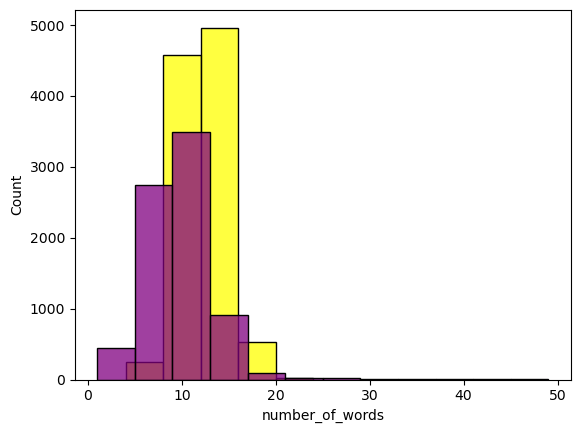

In [22]:
# histplot for Fake News words and True News words
sns.histplot(df['number_of_words'][df['label'] == 0],color='yellow',bins=60,binwidth=4)
sns.histplot(df['number_of_words'][df['label'] == 1],color='purple',bins=60,binwidth=4)

### **Let's make wordcloud of True and Fake News Respectively. so, we can analyze that which words are often used in both type of news.**

In [23]:
# make object of wordcloud
wc = WordCloud(background_color='black',min_font_size=10,width=500,height=500)

# Word Cloud for <font color ='blue'>TRUE</font> News

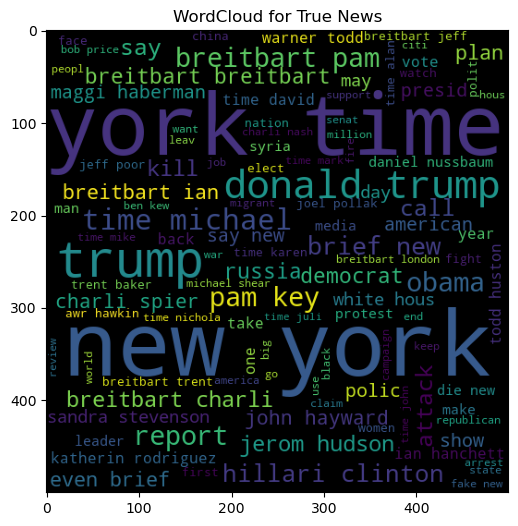

In [24]:
true_news_wc = wc.generate(df[df['label'] == 0]['transformed_content'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.title ("WordCloud for True News")
plt.imshow(true_news_wc)
plt.show()

# Word Cloud for <font color ='red'>FAKE</font> News

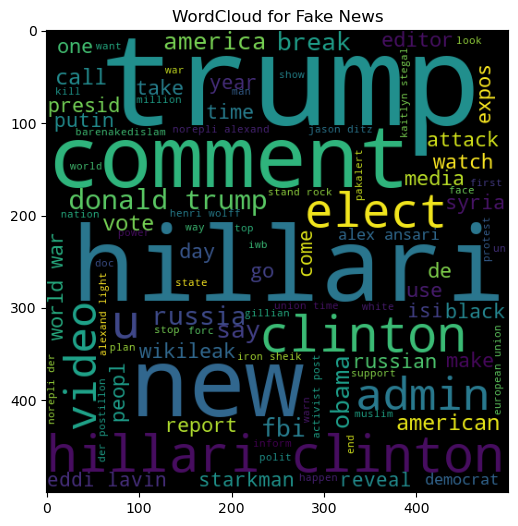

In [25]:
# WordCloud for Fake news
fake_news_wc = wc.generate(df[df['label'] == 1]['transformed_content'].str.cat(sep = " "))
plt.figure(figsize=(6,6))
plt.title ("WordCloud for Fake News")
plt.imshow(fake_news_wc)
plt.show()

### <b><font color ='black'>We can clearly see from this wordcloud that which words are most used in <font color ='blue'>TRUE</font> and <font color ='red'>FAKE</font> news.</b> </font> 

### **Let's find specific Count of words.**

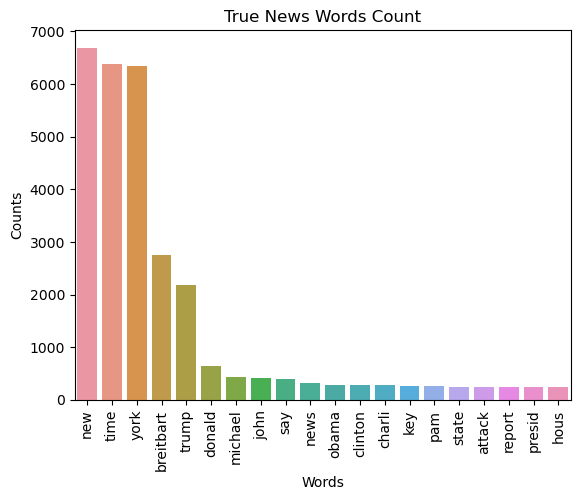

In [26]:
# create list of True News words
true_news_words_list = df[df['label']==0]['transformed_content'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

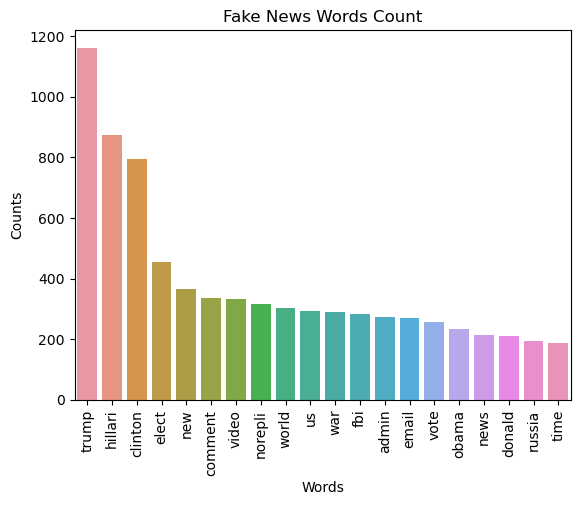

In [27]:
# create list of Fake News words
fake_news_words_list = df[df['label']==1]['transformed_content'].str.cat(sep = " ").split()

# create DataFrame of that
fake_news_words_df = pd.DataFrame(Counter(fake_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_words_df[0],y=fake_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

## <b><font color ='purple'>Feature Splitting</b> </font> 

In [28]:
# Let's Separate our Input and Output Columns
X = df['transformed_content'].values
y = df['label'].values

In [29]:
# let's do Train Test Split of Our Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
# Now Let's Do Vectorization of Transformed Content Using Bag of Words Technique
# create object of CountVectorizer
cf = CountVectorizer(max_features=5000)

In [31]:
# Convert X_train and Y_train into Vevtors
X_trf =  cf.fit_transform(X).toarray()
X_train = cf.fit_transform(X_train).toarray()
X_test = cf.transform(X_test).toarray()

## <b><font color ='purple'>Model Building</b> </font> 

In [32]:
# Build Model with Logistic Regression
lg = LogisticRegression(C=10)
lg.fit(X_train,y_train)

LogisticRegression(C=10)

In [33]:
mn=MultinomialNB()
mn.fit(X_train,y_train)

MultinomialNB()

In [34]:
p1 = X_test[0]
lg.predict(p1.reshape(1,-1))[0]

1

In [35]:
p2 = X_test[0]
mn.predict(p2.reshape(1,-1))[0]

1

In [36]:
def predict_news(text):
    cleaned_text = text_preprocessing(text)
    ps = pd.Series(cleaned_text)
    final_text = cf.transform(ps).toarray()
    pred = lg.predict(final_text.reshape(1,-1))[0]
    
    if pred == 0:
        print("It's a True News")
    
    else:
        print("It's a Fake News")


In [37]:
def predict_news(text):
    cleaned_text = text_preprocessing(text)
    ps = pd.Series(cleaned_text)
    final_text = cf.transform(ps).toarray()
    pred = mn.predict(final_text.reshape(1,-1))[0]
    
    if pred == 0:
        print("It's a True News")
    
    else:
        print("It's a Fake News")


In [38]:
predict_news("jame comey loretta lynch tri influenc statement hillari clinton investig charli spier")

It's a Fake News


In [41]:
# Model Evaluation of Logistic Regression
pred = lg.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)

Accuracy: 0.991


In [42]:
# Model Evaluation of Multinomial 
pred = mn.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)

Accuracy: 0.964


### **After building models we found Logistic Regression is Giving us Best result .**